CAR PRICE PREDICTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/car data.csv")
df.tail(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [ ]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
df.replace({'Fuel_Type' : {'Petrol' : 0,'Diesel' : 1,'CNG' : 2 }},inplace = True)
df.replace({'Seller_Type' : {'Dealer' : 0,'Individual' : 1}},inplace = True)
df.replace({'Transmission' : {'Manual' : 0,'Automatic' : 1}},inplace = True)

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting the Data into Training Data and Test Data

In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1.Linear Regression Model

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print(error_score)

0.8799451660493711


<function matplotlib.pyplot.show>

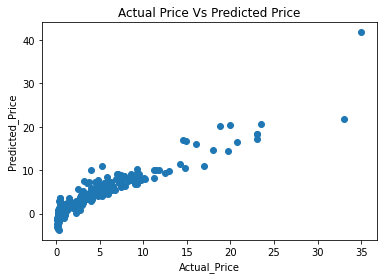

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print(error_score)

0.8365766715027051


<function matplotlib.pyplot.show>

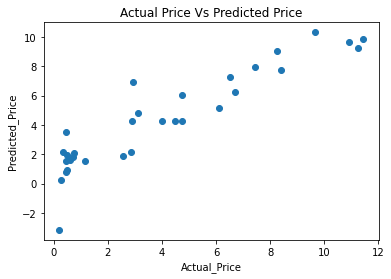

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show

2. Lasso Regression


In [ ]:
lasso_reg_model = Lasso()

In [ ]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
training_data_prediction = lasso_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print(error_score)

0.8427856123435794


<function matplotlib.pyplot.show>

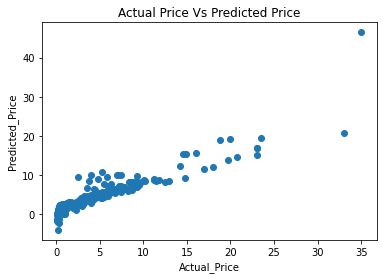

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show

In [ ]:
test_data_prediction = lasso_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print(error_score)

0.8709167941173195


<function matplotlib.pyplot.show>

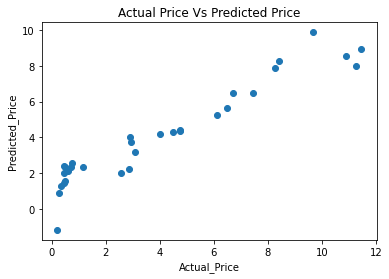

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show